In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_excel('data/normalized_data.xlsx')

In [29]:
def make_series(df, category):
    if isinstance(category, str):
        category = [category]
    
    # Выберем из df только те строки, где category равен одному из значений в списке category
    data = df[df['category'].isin(category)]
    
    # Оставим в data только 2 столбца - day и cashback_norm
    data = data[['day', 'cashback_norm']]
    
    # Группируем данные по дням и берем медиану значения cashback_norm
    data = data.groupby('day').median()
    
    return data 

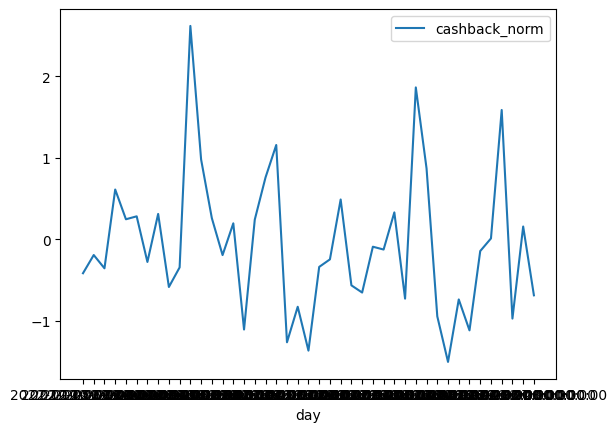

In [30]:
new_df = make_series(df, 'Готовая женская одежда')

sns.lineplot(data=new_df)
plt.show()